In [24]:
import pandas as pd 
from langchain_groq.chat_models import ChatGroq
import json
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier, plot_tree
from sklearn.metrics import accuracy_score, classification_report
import matplotlib.pyplot as plt

In [25]:
with open("secrets.json") as f:
    secrets = json.load(f)   
Groq_Token = secrets["groq"]

In [26]:
groq_models = {"llama3-70b": "llama3-70b-8192", "mixtral": "mixtral-8x7b-32768", "gemma-7b": "gemma-7b-it","llama3.1-70b":"llama-3.1-70b-versatile","llama3-8b":"llama3-8b-8192","llama3.1-8b":"llama-3.1-8b-instant","gemma-9b":"gemma2-9b-it"}


In [27]:
acc1=pd.read_csv("./Combined/Train/LAYING/Subject_1.csv")

def zsl(acc1):
    query = f"""
* You are a Human Activity Recognition model trained to classify human activities based on accelerometer data.
* Your task is to analyze the acceleration data provided in the x, y, and z directions and classify the activity being performed. The possible activities are 'Laying', 'Sitting', 'Standing', 'Walking', 'Walking_Downstairs', and 'Walking_Upstairs'.
* The accelerometer data represents movement patterns along three axes:
  - The x-axis typically captures forward and backward movement.
  - The y-axis captures lateral (side-to-side) movement.
  - The z-axis captures vertical movement, such as jumping or transitioning between sitting and standing.
* You need to provide only the answer in one word

    Acceleration: {acc1}
    """ 


    model_name = "llama3-70b" # We can choose any model from the groq_models dictionary
    llm = ChatGroq(model=groq_models[model_name], api_key=Groq_Token, temperature=0)
    answer = llm.invoke(query)

    return answer.content

print(zsl(acc1))

Walking_Downstairs


In [29]:
def fsl(acc):
    acc1=pd.read_csv("./Combined/Train/LAYING/Subject_1.csv")
    acc2=pd.read_csv("./Combined/Train/SITTING/Subject_1.csv")
    acc3=pd.read_csv("./Combined/Train/STANDING/Subject_1.csv")
    acc4=pd.read_csv("./Combined/Train/WALKING/Subject_1.csv")
    acc5=pd.read_csv("./Combined/Train/WALKING_DOWNSTAIRS/Subject_1.csv")
    acc6=pd.read_csv("./Combined/Train/WALKING_UPSTAIRS/Subject_1.csv")
    query = f"""
    * You are a Human Activity Recognition model trained to classify human activities based on accelerometer data.
* Your task is to analyze the acceleration data provided in the x, y, and z directions and classify the activity being performed. The possible activities outcomes are 'Laying', 'Sitting', 'Standing', 'Walking', 'Walking_Downstairs', and 'Walking_Upstairs'.
* The accelerometer data represents movement patterns along three axes:
  - The x-axis typically captures forward and backward movement.
  - The y-axis captures lateral (side-to-side) movement.
  - The z-axis captures vertical movement, such as jumping or transitioning between sitting and standing.
* You need to provide only the answer in one word
    1. Acceleration: {acc1}
    Output = Laying
    2. Acceleration: {acc2}
    Output = Sitting
    3. Acceleration: {acc3}
    Output = Standing
    4. Acceleration: {acc4}
    Output = Walking
    5. Acceleration: {acc5}
    Output = Walking_downstream
    6. Acceleration: {acc6}
    Output = Walking_upstream

    Acceleration: {acc}
    Output = ?
"""

    model_name = "llama3-70b"
    llm = ChatGroq(model=groq_models[model_name], api_key=Groq_Token, temperature=0)
    answer = llm.invoke(query)

    return answer.content
acc= "./Combined/Test/WALKING_DOWNSTAIRS/Subject_10.csv"
print(fsl(acc))

Walking_Downstairs


In [8]:
import pandas as pd
import os
from sklearn.metrics import accuracy_score

folder = "./Combined/Test/"
folders = os.listdir(folder)

actual_labels = []
zsl_predictions = []
fsl_predictions = []

for fol in folders:
    print(f"Processing folder: {fol}")
    all_files = os.listdir(os.path.join(folder, fol))
    csv_files = [file for file in all_files if file.endswith('.csv')]
    
    for file_name in csv_files:
        file_path = os.path.join(folder, fol, file_name)
        
        data = pd.read_csv(file_path)
        
        actual_label = fol
        
        zsl_prediction = zsl(data)
        fsl_prediction = fsl(data)
        
        actual_labels.append(actual_label)
        zsl_predictions.append(zsl_prediction.strip().upper())
        fsl_predictions.append(fsl_prediction.strip().upper())

zsl_accuracy = accuracy_score(actual_labels, zsl_predictions)
fsl_accuracy = accuracy_score(actual_labels, fsl_predictions)

print(f"Zero-shot accuracy: {zsl_accuracy * 100:.2f}%")
print(f"Few-shot accuracy: {fsl_accuracy * 100:.2f}%")

Processing folder: LAYING
Processing folder: SITTING
Processing folder: STANDING
Processing folder: WALKING
Processing folder: WALKING_DOWNSTAIRS
Processing folder: WALKING_UPSTAIRS
Zero-shot accuracy: 31.48%
Few-shot accuracy: 48.15%


In [9]:
# zsl_predictions
fsl_predictions

['LAYING',
 'LAYING',
 'LAYING',
 'LAYING',
 'LAYING',
 'LAYING',
 'LAYING',
 'LAYING',
 'LAYING',
 'SITTING',
 'STANDING',
 'SITTING',
 'SITTING',
 'STANDING',
 'STANDING',
 'SITTING',
 'STANDING',
 'STANDING',
 'STANDING',
 'STANDING',
 'STANDING',
 'STANDING',
 'STANDING',
 'SITTING',
 'STANDING',
 'STANDING',
 'STANDING',
 'WALKING',
 'WALKING',
 'WALKING',
 'STANDING',
 'WALKING',
 'STANDING',
 'WALKING',
 'STANDING',
 'SITTING',
 'WALKING',
 'STANDING',
 'WALKING',
 'STANDING',
 'WALKING',
 'WALKING',
 'SITTING',
 'SITTING',
 'WALKING',
 'WALKING',
 'WALKING',
 'WALKING',
 'WALKING',
 'WALKING',
 'WALKING',
 'WALKING',
 'STANDING',
 'LAYING']

### Which is better Zero shot learning or Few shot learning?

We have seen that few-shot learning have more Accuracy than the zero shot learning because in few shot lerning we give some example data which help the model to identify the human activity more corectly where as zero shot may be less trained and biased all the model may be biased. Few shot learning is better than the zero shot learning in given senerio.

### Quantitatively compare the accuracy of Few-Shot Learning with Decision Trees

#### Load Human activity Data for Decision tree

In [8]:

from sklearn.model_selection import train_test_split
import pandas as pd
import numpy as np
import os
import matplotlib.pyplot as plt


time = 10
offset = 100
folders = ["LAYING","SITTING","STANDING","WALKING","WALKING_DOWNSTAIRS","WALKING_UPSTAIRS"]
classes = {"WALKING":1,"WALKING_UPSTAIRS":2,"WALKING_DOWNSTAIRS":3,"SITTING":4,"STANDING":5,"LAYING":6}

combined_dir = os.path.join("./Combined")

X_train=[]
y_train=[]
dataset_dir = os.path.join(combined_dir,"Train")

for folder in folders:
    files = os.listdir(os.path.join(dataset_dir,folder))

    for file in files:

        df = pd.read_csv(os.path.join(dataset_dir,folder,file),sep=",",header=0)
        df = df[offset:offset+time*50]
        X_train.append(df.values)
        y_train.append(classes[folder])

X_train = np.array(X_train)
y_train = np.array(y_train)

X_test=[]
y_test=[]
dataset_dir = os.path.join(combined_dir,"Test")

for folder in folders:
    files = os.listdir(os.path.join(dataset_dir,folder))
    for file in files:

        df = pd.read_csv(os.path.join(dataset_dir,folder,file),sep=",",header=0)
        df = df[offset:offset+time*50]
        X_test.append(df.values)
        y_test.append(classes[folder])

X_test = np.array(X_test)
y_test = np.array(y_test)

X = np.concatenate((X_train,X_test))
y = np.concatenate((y_train,y_test))

seed = 4
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.3,random_state=seed,stratify=y)

X = (np.sum(np.square(X), axis=2))

In [20]:

def decisiontree(X,y):
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

    clf = DecisionTreeClassifier(random_state=42)
    clf.fit(X_train, y_train)

    y_pred = clf.predict(X_test)

    accuracy = accuracy_score(y_test, y_pred)
    print(f"Accuracy: {accuracy:.4f}")
    print("\nClassification Report:")
    print(classification_report(y_test, y_pred))

    plt.figure(figsize=(20, 10))
    plot_tree(clf, filled=True, feature_names=[i for i in range(500)], class_names=np.unique(y).astype(str), fontsize=10)
    plt.title("Decision Tree Visualization")
    plt.show()

Accuracy: 0.5185

Classification Report:
              precision    recall  f1-score   support

           1       0.50      0.30      0.38        10
           2       0.38      0.25      0.30        12
           3       0.44      0.67      0.53         6
           4       0.44      0.44      0.44         9
           5       0.86      0.75      0.80         8
           6       0.53      0.89      0.67         9

    accuracy                           0.52        54
   macro avg       0.53      0.55      0.52        54
weighted avg       0.52      0.52      0.50        54



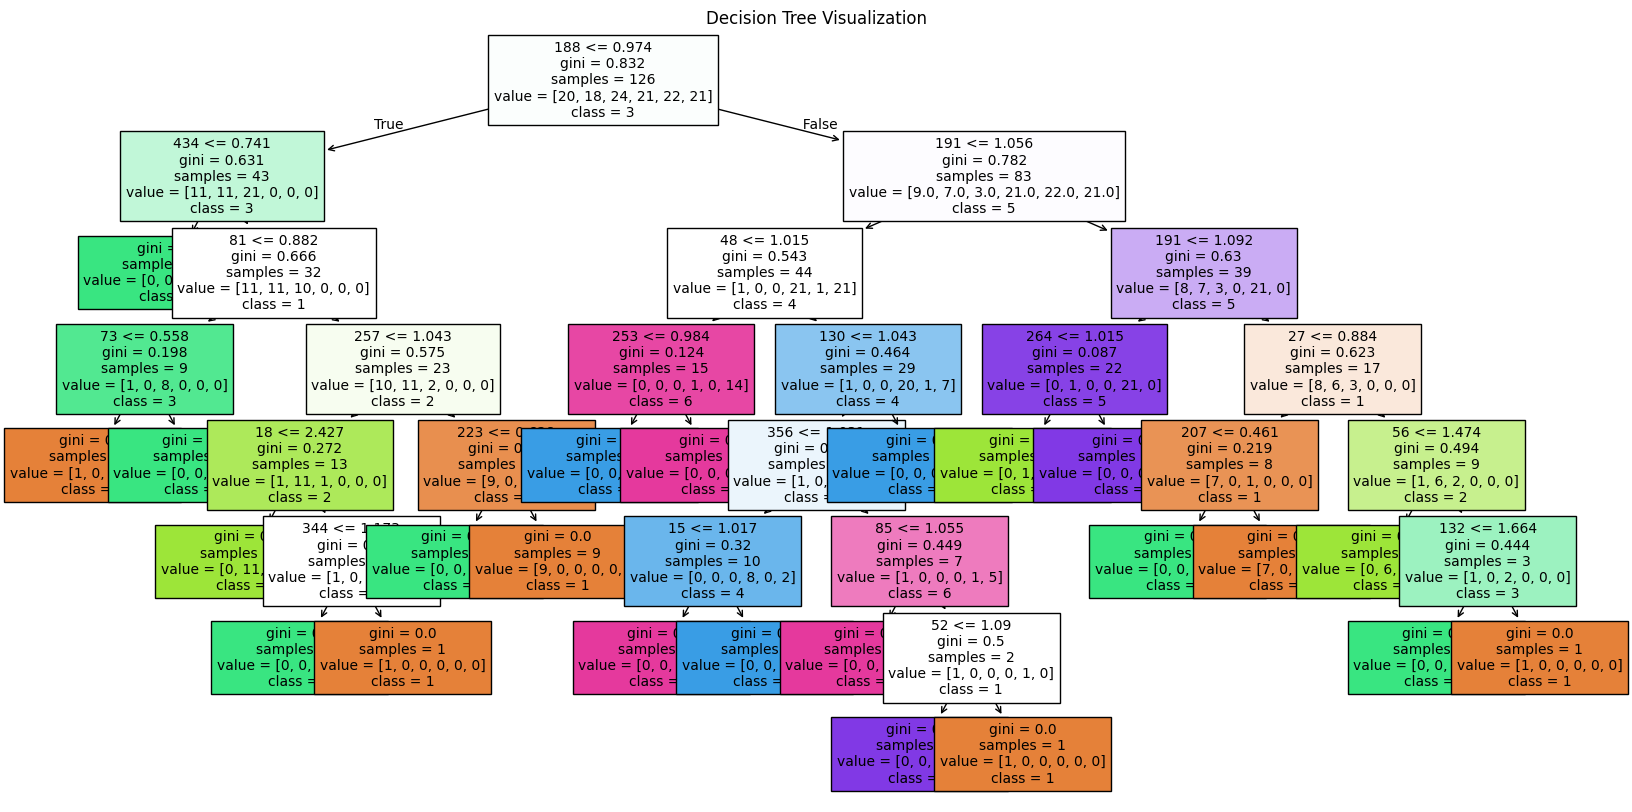

In [21]:
decisiontree(X,y)


Now we know the accuracy of decision tree: 52% 
<br>
Previously we found the accuracy of few shot learning: 48%

Here We can say that Decision tree is better than Few shot Learning. Decision Trees are well-suited for structured data like accelerometer readings, where the features are numeric and well-defined. They can effectively capture the decision boundaries in the feature space. The Few-Shot Learning model shows less accuracy likely due to overfitting and limited labeled data. The limited number of examples in Few-Shot Learning can lead to poor generalization, especially in a structured prediction task like this.

### What are the limitation of Zero-shot and Few-shot learning?

Zero shot learning is heavily depend on the description and prompt provided. if relationship between accelerometer data and the activities are not well define then model give wrong output.

Few Shot learning based on the labled example provided and the LLM model used. Due to limited labled example the model will be biased and may be overfitted. Few shot learning will work with the limited examples and It may not be scalable globally.

### What does the model classify when given input from an entirely new activity that it hasn't seen before?

In such case when given input is entirely new activity. It will have to do prediction of nearly given activities. For such activity both zero shot learning and few shot learning will provide answer based on the prompts or examples. 
<br>
For this we performed a cycling activity to check weather what the model will classify.

For converting 400Hz frequency to 50Hz frequency:
<br>
50Hz_data = 400Hz_data.iloc[::8].reset_index(drop=True)

In [30]:
Cycling_data = pd.read_csv("Cycling_50Hz.csv")

print(zsl(Cycling_data))
print(fsl(Cycling_data))

Standing
Laying


### Test the model with random data (ensuring the data has the same dimensions and range as the previous input) and report the results.

#### Below is the code to generate a random Data

In [42]:
import numpy as np

random_data = pd.DataFrame(
    np.random.uniform(-10, 10, size=(300,3)),
    columns=("accx","accy","accz")
)
random_data=np.round(random_data,3)

output_file_path = "random_acc_data.csv"
random_data.to_csv(output_file_path, index=False)

output_file_path

'random_acc_data.csv'

### Here is the result of the random acceleration data

In [43]:
random_file = pd.read_csv("random_acc_data.csv")
print(zsl(random_file))
print(fsl(random_file))

Walking
Walking


Here, we can see that the both the model classifying the random accerometer data 